In [12]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD

In [13]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

In [14]:
# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

In [15]:
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.11, test acc:0.1112
epoch:1, train acc:0.14666666666666667, test acc:0.1322
epoch:2, train acc:0.17666666666666667, test acc:0.1468
epoch:3, train acc:0.19333333333333333, test acc:0.1598
epoch:4, train acc:0.21333333333333335, test acc:0.1806
epoch:5, train acc:0.25333333333333335, test acc:0.1972
epoch:6, train acc:0.26, test acc:0.2074
epoch:7, train acc:0.30666666666666664, test acc:0.2211
epoch:8, train acc:0.30666666666666664, test acc:0.241
epoch:9, train acc:0.33, test acc:0.2547
epoch:10, train acc:0.33666666666666667, test acc:0.2674
epoch:11, train acc:0.36, test acc:0.2754
epoch:12, train acc:0.3566666666666667, test acc:0.2878
epoch:13, train acc:0.37, test acc:0.2914
epoch:14, train acc:0.4066666666666667, test acc:0.3153
epoch:15, train acc:0.43, test acc:0.3193
epoch:16, train acc:0.45, test acc:0.3284
epoch:17, train acc:0.4633333333333333, test acc:0.3412
epoch:18, train acc:0.4633333333333333, test acc:0.3457
epoch:19, train acc:0.49, test acc:0.

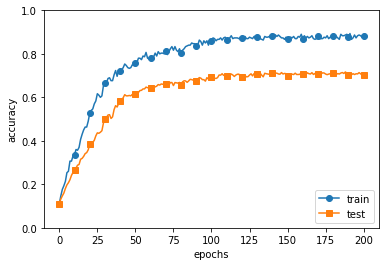

In [16]:
# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [28]:
np.random.rand(10,10) > 0.5

array([[False, False,  True, False, False, False, False, False, False,
         True],
       [ True,  True, False, False, False, False,  True, False, False,
        False],
       [ True, False,  True, False, False, False, False, False,  True,
         True],
       [False, False, False,  True,  True, False, False,  True, False,
         True],
       [False,  True, False, False, False, False,  True,  True, False,
         True],
       [ True, False, False, False,  True, False,  True,  True, False,
         True],
       [ True,  True,  True,  True, False,  True, False, False, False,
         True],
       [False,  True,  True,  True,  True,  True,  True, False,  True,
        False],
       [ True, False, False,  True, False,  True,  True,  True, False,
         True],
       [ True, False, False, False, False, False, False,  True, False,
         True]])

In [25]:
*[10,10]

SyntaxError: can't use starred expression here (<ipython-input-25-f5b244fcb748>, line 4)